In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import os
import sys
sys.path.append(os.path.join(os.path.abspath(''), '..'))
from utils.dla import get_neighbors, new_position, step, radius_of_gyration

1000/1000

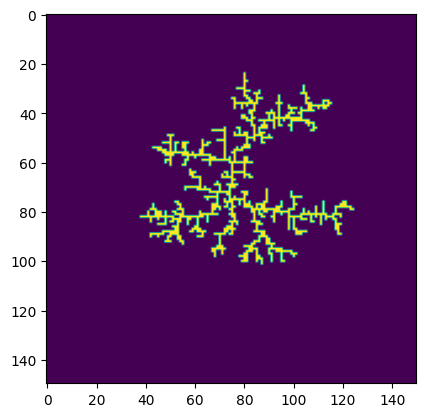

In [20]:
n = 150
grid = np.zeros((n,n))
grid[n//2, n//2] = 1

current = new_position(grid)
neighbors = get_neighbors(grid)

grid_list = [grid]
n_neighbors = [4]
gyrations = []
i = 0
while i < 1000:
    current, stopped = step(grid, current, neighbors)
    i += stopped
    if stopped:
        grid[*current] = 1
        grid_list.append(grid.copy())
        current = new_position(grid)
        neighbors = get_neighbors(grid)
        n_neighbors.append(((neighbors + grid) > 0).sum() - (i+1))
        gyrations.append(radius_of_gyration(grid))
        print(f'\r{i}/1000', end='')

plt.imshow(grid);

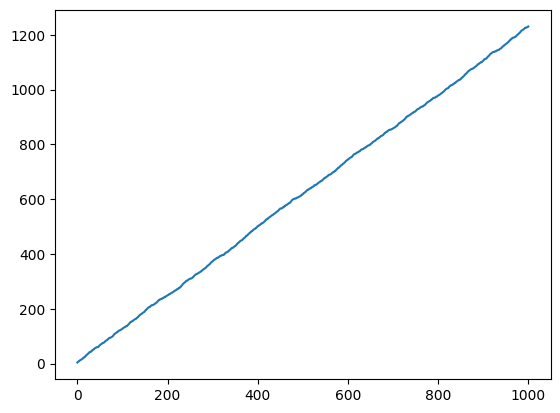

Slope: 1.2213175447307185


In [21]:
plt.plot(n_neighbors)
plt.show()

print(f'Slope: {np.polyfit(range(len(n_neighbors)), n_neighbors, 1)[0]}')

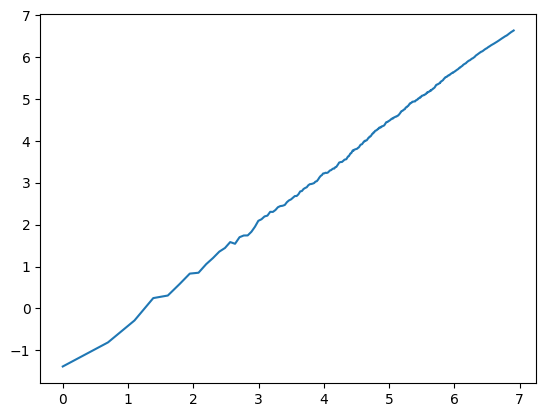

Slope: 1.0367734802949433


In [22]:
x = np.arange(len(gyrations)) + 1
plt.plot(np.log(x), np.log(gyrations))
plt.show()

print('Slope:', np.polyfit(np.log(x[500:]), np.log(gyrations[500:]), 1)[0])

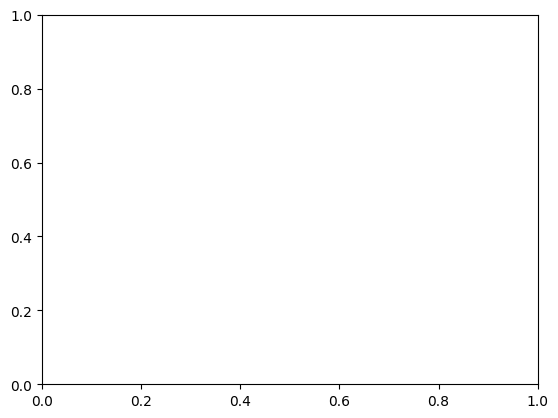

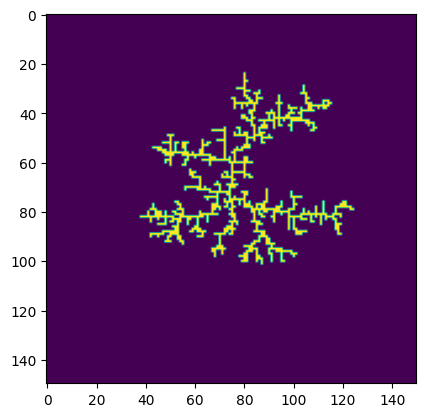

In [23]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    ax.imshow(grid_list[5*i])

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, update, frames=200, interval=5)

writer = animation.PillowWriter()
ani.save(f'../images/animation.gif', writer=writer)